# Hotel Checkin Prediction
In this note book we are going to be creating a machine learning model to *predict whether a customer is going to checkin or not*. I am going to be using the data that was given to me by the **NextLabs team**.
- We are going to be creating a Neural Network.
- To work with our model, the data should be encoded, scaled(if necessary)
- Make predictions and measure the accuracy and precision using confusion matrix and classification report

## Importing


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import  seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report
import pickle

## Loading the Data

##### I think there has been a little mistake in the documentation provided by the team. They misplaced the links for the training and test data(They've given  the link for test data as the train data and vice versa). I have seen it and done the corrections in importing them.

In [2]:
train = pd.read_csv("/content/drive/MyDrive/train_data_evaluation_part_2.csv", index_col=False)
train.head()

,Unnamed: 0,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,0,1,PRT,51.0,150,45,371.0,105.3,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2,PRT,NaN,1095,61,280.0,53.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,3,DEU,31.0,1095,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,4,FRA,60.0,1095,93,240.0,60.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,5,FRA,51.0,1095,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test = pd.read_csv("/content/drive/MyDrive/test_data_evaluation_part2.csv", index_col=False)

In [4]:
train.shape

(82580, 30)

In [5]:
test.shape

(1000, 30)

I am going to be combining these two cols to make it easy working with the data i.e is to make changes and encoding and all.

In [6]:
df = pd.concat([train,test],axis=0)# concating by rows
df.shape

(83580, 30)

Let's take a look at the dtypes of the columns of the dataframe

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83580 entries, 0 to 999
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            83580 non-null  int64  
 1   ID                    83580 non-null  int64  
 2   Nationality           83580 non-null  object 
 3   Age                   79801 non-null  float64
 4   DaysSinceCreation     83580 non-null  int64  
 5   AverageLeadTime       83580 non-null  int64  
 6   LodgingRevenue        83580 non-null  float64
 7   OtherRevenue          83580 non-null  float64
 8   BookingsCanceled      83580 non-null  int64  
 9   BookingsNoShowed      83580 non-null  int64  
 10  BookingsCheckedIn     83580 non-null  int64  
 11  PersonsNights         83580 non-null  int64  
 12  RoomNights            83580 non-null  int64  
 13  DaysSinceLastStay     83580 non-null  int64  
 14  DaysSinceFirstStay    83580 non-null  int64  
 15  DistributionChannel  

Most of the columns are in numeric format which is a good thing when it comes to training. I want to see the unique values of each object column

In [8]:
def unique_obj_col_value(df):
  for column in df:
    if df[column].dtype == 'object':
      print(f'{column}: {df[column].unique()}')

In [9]:
unique_obj_col_value(df)

Nationality: ['PRT' 'DEU' 'FRA' 'JPN' 'IRL' 'ESP' 'BEL' 'NLD' 'AUT' 'ITA' 'CHN' 'RUS'
 'POL' 'USA' 'HUN' 'CRI' 'MEX' 'CHE' 'ROU' 'GBR' 'BIH' 'BRA' 'FIN' 'AGO'
 'CAN' 'ZAF' 'TWN' 'GRC' 'AUS' 'ISR' 'BGR' 'SAU' 'SWE' 'CYP' 'ARG' 'ARM'
 'CHL' 'MAR' 'MOZ' 'KOR' 'TUN' 'DNK' 'NOR' 'MYS' 'EGY' 'IND' 'HRV' 'CPV'
 'JOR' 'COD' 'DZA' 'LUX' 'TUR' 'IRN' 'LBY' 'PAN' 'COL' 'VEN' 'GNB' 'CZE'
 'AND' 'SVN' 'PER' 'ATF' 'UGA' 'AZE' 'NZL' 'LTU' 'SRB' 'EST' 'KAZ' 'KWT'
 'IDN' 'UKR' 'SVK' 'MLI' 'ARE' 'BGD' 'THA' 'TZA' 'LVA' 'PHL' 'BHR' 'NAM'
 'BOL' 'SGP' 'CMR' 'MLT' 'URY' 'PAK' 'JAM' 'ECU' 'SYC' 'QAT' 'PRY' 'BRB'
 'OMN' 'TMP' 'ABW' 'LBN' 'AIA' 'SLV' 'DMA' 'CUB' 'VNM' 'GEO' 'IRQ' 'GAB'
 'PYF' 'LIE' 'SEN' 'BLR' 'ISL' 'DOM' 'GUY' 'LCA' 'ATA' 'NGA' 'RWA' 'CIV'
 'ALB' 'MKD' 'MNE' 'GTM' 'GHA' 'MDV' 'MCO' 'MUS' 'SYR' 'TGO' 'LKA' 'SUR'
 'KEN' 'MRT' 'HKG' 'CAF' 'NCL' 'STP' 'UZB' 'KIR' 'SDN' 'PRI' 'KNA' 'TJK'
 'SLE' 'LAO' 'COM' 'ETH' 'FRO' 'BEN' 'ZWE' 'ASM' 'BWA' 'ERI' 'SPM' 'JEY'
 'GNQ' 'MDG' 'GIN' 'NIC' 'SWZ' 'CYM' '

In [10]:
df['Nationality'].nunique()

188

The nationality column has 188 unique values in it. If we were to use one hot encoding then we would end up with additional 188 columns aside from the already existing ones. What I can do here is that I can collapse the values into 'Other' if they have a value count of less than let's say 1000.

In [11]:
df.Nationality.value_counts()


FRA    12418
PRT    11593
DEU    10232
GBR     8656
ESP     4902
       ...  
GIN        1
KNA        1
GNQ        1
JEY        1
NPL        1
Name: Nationality, Length: 188, dtype: int64

In [12]:
def collapse_category(df):
  s = df['Nationality'].value_counts()
  df.loc[df['Nationality'].isin(s[s<1000].index), 'Nationality'] = 'Others'
  print(df['Nationality'].unique())
  print(df['Nationality'].nunique())

In [13]:
collapse_category(df)

['PRT' 'DEU' 'FRA' 'Others' 'IRL' 'ESP' 'BEL' 'NLD' 'AUT' 'ITA' 'USA'
 'CHE' 'GBR' 'BRA' 'CAN' 'SWE']
16


As you can see, we now ended up with 16 unique values which is way better than 188. All we have to do now is to encode the categorical cols. But before that let's do some visualization to understand what is going on. I particularly want to see if the room characteristics has anything to do with customers checkingin.

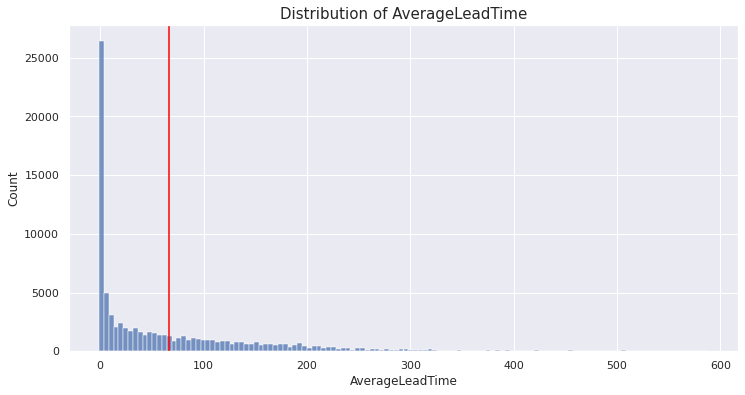

In [14]:
sns.set()
fig = plt.figure(figsize=(12,6))
sns.histplot(df.AverageLeadTime)
plt.axvline(x=df['AverageLeadTime'].mean(),
            color='red')
plt.title("Distribution of AverageLeadTime",size=15)
plt.show()

On average the customers are taking around 80 minutes to complete there checkin(book) for the room

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


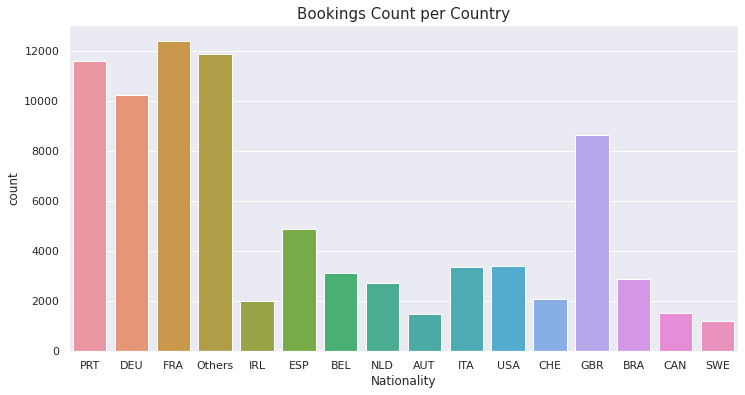

In [15]:
fig = plt.figure(figsize=(12, 6))
sns.countplot(df['Nationality'])
plt.title("Bookings Count per Country", size=15)
plt.show()

France has more entries in the dataset.Sweden being the lowest (While not considering "Others")

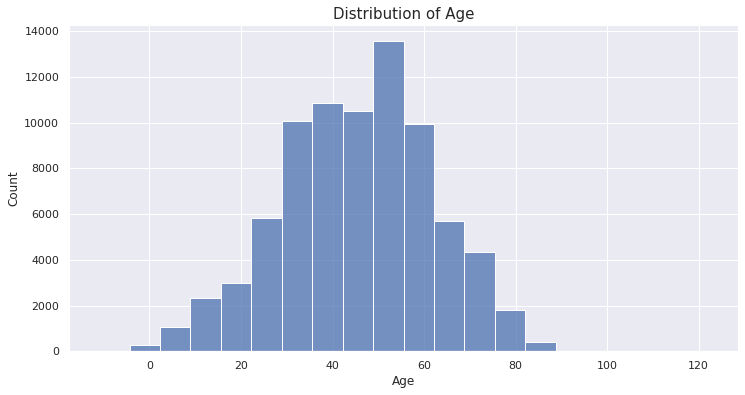

In [16]:
fig = plt.figure(figsize=(12, 6))
sns.histplot(df['Age'], bins=20)
plt.title("Distribution of Age", size=15)
plt.show()

So most of the bookings are done by people aged between 50-55.

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


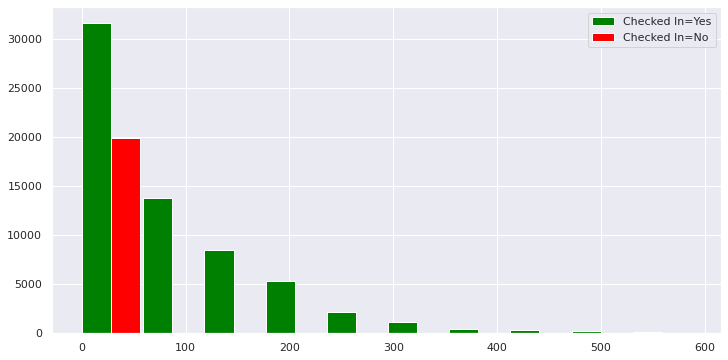

In [17]:
fig = plt.figure(figsize=(12,6))
avg_yes = df[df['BookingsCheckedIn'] > 0].AverageLeadTime
avg_no = df[df['BookingsCheckedIn'] == 0].AverageLeadTime
plt.hist([avg_yes, avg_no], rwidth=0.95, color=['green','red'],label=['Checked In=Yes','Checked In=No'])
plt.legend()
plt.show()

### **Lead Time**: the number of days between the time a guest books their room and the time they are scheduled to arrive at the hotel.

I am going to consider the data as days. On average The lead time for customers who check in is around 10-15 days. For the customers who did not check in it was around 20-25 days.

Since we are to predict whether a customer has checked in or not, we are going to take "BookingsCheckedIn" as our target variable. But when we take a look at it, it is not a binary type column(0 or 1). Since we only need whether customers checked in we are going to replace every thing greater that 0 to 1.

In [18]:
df['BookingsCheckedIn'].unique()

array([ 3,  1,  0,  9,  2, 11, 12,  7,  8,  5,  6,  4, 66, 15, 29, 25, 10,
       17, 13, 26, 23, 57, 40, 18, 14, 24, 19, 20, 34])

In [19]:
df['BookingsCheckedIn'] = df['BookingsCheckedIn'].replace([ 3,  1, 9,  2, 11, 12,  7,  8,  5,  6,  4, 66, 15, 29, 25, 10,
       17, 13, 26, 23, 57, 40, 18, 14, 24, 19, 20, 34], 1)

## One Hot Encoding

In [20]:
df.drop('Nationality', axis=1,inplace=True)

In [21]:
cols = ['DistributionChannel', 'MarketSegment']
le = LabelEncoder()
for col in cols:
  df[col] = le.fit_transform(df[col])


In [22]:
df.drop(['Unnamed: 0', 'ID'], axis=1, inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 83580 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   79801 non-null  float64
 1   DaysSinceCreation     83580 non-null  int64  
 2   AverageLeadTime       83580 non-null  int64  
 3   LodgingRevenue        83580 non-null  float64
 4   OtherRevenue          83580 non-null  float64
 5   BookingsCanceled      83580 non-null  int64  
 6   BookingsNoShowed      83580 non-null  int64  
 7   BookingsCheckedIn     83580 non-null  int64  
 8   PersonsNights         83580 non-null  int64  
 9   RoomNights            83580 non-null  int64  
 10  DaysSinceLastStay     83580 non-null  int64  
 11  DaysSinceFirstStay    83580 non-null  int64  
 12  DistributionChannel   83580 non-null  int64  
 13  MarketSegment         83580 non-null  int64  
 14  SRHighFloor           83580 non-null  int64  
 15  SRLowFloor           

In [23]:
df.head()

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,51.0,150,45,371.0,105.3,1,0,1,8,5,...,0,0,0,0,0,0,0,0,0,0
1,NaN,1095,61,280.0,53.0,0,0,1,10,5,...,0,0,0,0,0,0,0,0,0,0
2,31.0,1095,0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,60.0,1095,93,240.0,60.0,0,0,1,10,5,...,0,0,0,0,0,0,0,0,0,0
4,51.0,1095,0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
df.shape

(83580, 27)

In [25]:
df['Age'].fillna(np.mean(df['Age']),inplace=True)

In [26]:
df.shape

(83580, 27)

## Scaling the cols
Since most of my values are either 0 or 1. I am going to scale my remaining data to be some where near it. I can use sklearn's MinMaxScaler() for achieving this.

In [27]:
cols_to_scale = ['Age','DaysSinceCreation', 'AverageLeadTime', 'LodgingRevenue', 'OtherRevenue', 'DaysSinceLastStay', 'DaysSinceFirstStay']
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [28]:
df.head()

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,0.466165,0.136986,0.078098,0.017033,0.013622,1,0,1,8,5,...,0,0,0,0,0,0,0,0,0,0
1,0.424052,1.000000,0.105263,0.012855,0.006856,0,0,1,10,5,...,0,0,0,0,0,0,0,0,0,0
2,0.315789,1.000000,0.001698,0.000000,0.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.533835,1.000000,0.159593,0.011019,0.007762,0,0,1,10,5,...,0,0,0,0,0,0,0,0,0,0
4,0.466165,1.000000,0.001698,0.000000,0.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Splitting data into Train and Test Dataset

In [29]:
X = df.drop('BookingsCheckedIn', axis=1)
y = df['BookingsCheckedIn']
print(X.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

(83580, 26)


In [30]:
X_train.shape

(66864, 26)

In [31]:
y_train.shape

(66864,)

In [32]:
X_test.shape

(16716, 26)

In [33]:
df.shape

(83580, 27)

In [34]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83580 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   83580 non-null  float64
 1   DaysSinceCreation     83580 non-null  float64
 2   AverageLeadTime       83580 non-null  float64
 3   LodgingRevenue        83580 non-null  float64
 4   OtherRevenue          83580 non-null  float64
 5   BookingsCanceled      83580 non-null  int64  
 6   BookingsNoShowed      83580 non-null  int64  
 7   PersonsNights         83580 non-null  int64  
 8   RoomNights            83580 non-null  int64  
 9   DaysSinceLastStay     83580 non-null  float64
 10  DaysSinceFirstStay    83580 non-null  float64
 11  DistributionChannel   83580 non-null  int64  
 12  MarketSegment         83580 non-null  int64  
 13  SRHighFloor           83580 non-null  int64  
 14  SRLowFloor            83580 non-null  int64  
 15  SRAccessibleRoom     

## Creating the MultiNomialNB


In [35]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train,y_train)
model.score(X_test,y_test)

1.0

In [36]:
yp = model.predict(X_test)
yp[:5]

array([1, 1, 1, 0, 1])

In [37]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3955
           1       1.00      1.00      1.00     12761

    accuracy                           1.00     16716
   macro avg       1.00      1.00      1.00     16716
weighted avg       1.00      1.00      1.00     16716



Text(66.5, 0.5, 'Truth')

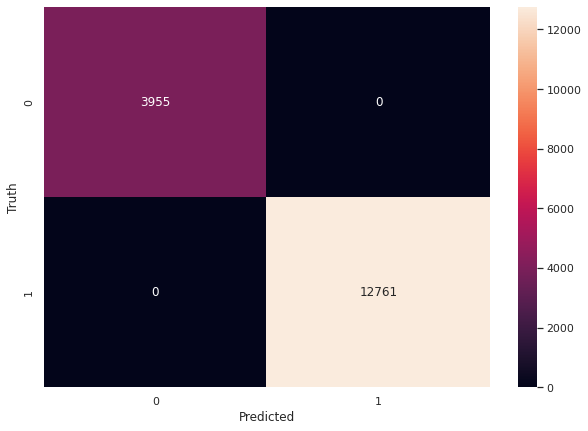

In [39]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Accuracy

In [42]:
round((3955+12761)/(3955+12761),2)

1.0

Our model has an accuracy of 1.0 or 100%. This would have been a problem if it was only in training, But our model was able to get 100% even in the test. What we can infer from this? I think our model is great but when introduced some discrpent data the accuracy may go down a bit. But for the time period our model is doing fine! 

## Precision

In [43]:
round((3955)/(3955),2)

1.0

The model has a precision of 1.0 or 100%